# Salary Analysis

## 1. Data UnderstandingThe dataset contains data related to salaries in the data science field, with factors such as experience, job title, and work level affecting the salaries. The purpose is to analyze these elements and their influence on salary trends.



In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## 2. Data Preparation
 We load the data, remove unnecessary columns, handle missing values, check for duplicates, view unique values, and rename experience levels. First, we clean the data by removing unnecessary columns and handling missing values. We also rename the experience levels for better readability.

### 2.1. Load the data into a pandas DataFrame


In [6]:
#reading the data into pandas
import pandas as pd

# Reading the data into a pandas DataFrame
data = pd.read_csv('salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### 2.2. Remove unnecessary columns i.e., salary and salary currency.


In [9]:
#remove unnecessary columns
clean_data = data.drop(columns=['salary', 'salary_currency'])
clean_data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


### 2.3. Remove the NaN missing values from updated dataframe.
NaN means not a number i.e. dropping any row with missing values

In [12]:
#checking missing values
clean_data.isna()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False


In [13]:
#checking missing values
clean_data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
#removing missing values
clean_data = clean_data.dropna()
clean_data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


### 2.4. Check duplicates value in the dataframe


In [16]:
#To check duplicates value in the dataframe in columns

# Iterate over each column in the DataFrame
for column in clean_data.columns:
    # Find duplicates in the current column
    duplicates = clean_data[column].duplicated().sum()
    print("Number of duplicate values in " + column + ": " + str(duplicates))
     # Get the counts of each value in the column
    value_counts = clean_data[column].value_counts()
    
    # Filter the counts to find values that appear more than once
    duplicates = value_counts[value_counts > 1]
    print(duplicates)

Number of duplicate values in work_year: 3751
work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64
Number of duplicate values in experience_level: 3751
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
Number of duplicate values in employment_type: 3751
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
Number of duplicate values in job_title: 3662
job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Data Analytics Specialist       2
AI Programmer                   2
Data Strategist                 2
Big Data Architect              2
Software Data Engineer          2
Name: count, Length: 75, dtype: int64
Number of duplicate values in salary_in_usd: 2720
salary_in_usd
100000    99
150000    98
120000    91
160000    84
1300

### 2.5 See the unique values from all the columns


In [18]:
# Initialize an empty dictionary to store the unique values
unique_values = {}

# Loop through each column in the DataFrame
for col in clean_data.columns:
    # Retrieve the unique values of the column and add it to the dictionary
    unique_values[col] = clean_data[col].unique()

# Display the dictionary containing unique values for each column
# Display the results
print("Unique Values:")
for key, value in unique_values.items():
    print(key + ": " + str(len(value)) + " unique values")

Unique Values:
work_year: 4 unique values
experience_level: 4 unique values
employment_type: 4 unique values
job_title: 93 unique values
salary_in_usd: 1035 unique values
employee_residence: 78 unique values
remote_ratio: 3 unique values
company_location: 72 unique values
company_size: 3 unique values


## 2.6 Rename the experience level columns as below.
SE – Senior Level/Exper
4
MI – Medium Level/Intermediate
EN – Entry Level
EX – Executive evel

In [20]:
# Define the mapping dictionary for experience levelsexperience_level_mapping = {
    'SE': 'Senior Level/Expert',
    'MI': 'Medium Level/Intermediate',
    'EN': 'Entry-Level',
    'EX': 'Executive Level'
}

clean_data['experience_level'] = clean_data['experience_level'].replace(experience_level_mapping)
display (clean_data)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level/Expert,FT,Data Scientist,412000,US,100,US,L
3751,2021,Medium Level/Intermediate,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,Entry-Level,FT,Data Scientist,105000,US,100,US,S
3753,2020,Entry-Level,CT,Business Data Analyst,100000,US,100,US,L


## 3. Data Analysis
This includes the calculation for the summary statistics for the 'salary_in_usd' column and explore correlations among numerical columns.

### 3.1. Summary statistics of Column salary_in_usd




In [23]:
# Selecting salary_in_usd column for statistics
salary_data = data['salary_in_usd']

# Using describe() to get basic statistics
basic_stats = salary_data.describe()

# Displaying the statistics
print("Basic Statistical Summary of Salaries in USD:")
print(basic_stats)

Basic Statistical Summary of Salaries in USD:
count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


### Calculate sum, skewness, and kurtosis of Column salary_in_usd

In [25]:
# Calculating sum, skewness, and kurtosis
total_sum = salary_data.sum()
skewness = salary_data.skew()
kurtosis = salary_data.kurt()

print("\nSum of salaries in USD:", total_sum)
print("Skewness of salaries in USD :", skewness)
print("Kurtosis of salaries in USD:", kurtosis)


Sum of salaries in USD: 516576814
Skewness of salaries in USD : 0.5364011659712974
Kurtosis of salaries in USD: 0.8340064594833612


### 3.2. Calculate and show correlation of all variables

In [27]:
# Calculate the correlation matrix for all numerical variables in the DataFrame
numeric_data = clean_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix using numpy
correlation = numeric_data.corr().round(2)

# Display the correlation matrix
print("Correlation Matrix:")
correlation

Correlation Matrix:


,work_year,salary_in_usd,remote_ratio
work_year,1.00,0.23,-0.24
salary_in_usd,0.23,1.00,-0.06
remote_ratio,-0.24,-0.06,1.00


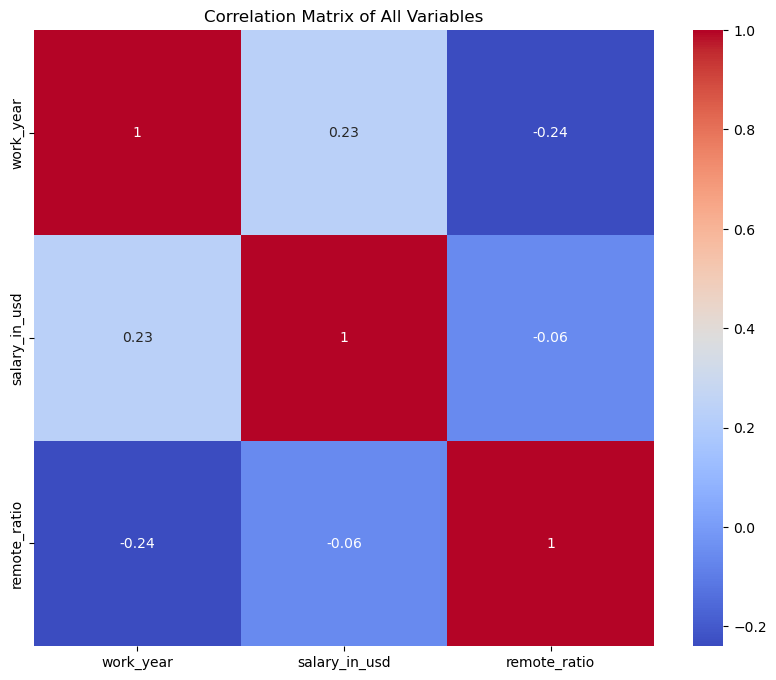

In [28]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of All Variables')

# Save the figure
plt.savefig('correlation1.jpg')  # Saves the figure as a PNG file
plt.show()

## 4. Data Exploration

### 4.1. Top 15 job titles by frequency and the relationship between job titles and salaries

In [31]:
# Calculate the frequency of each job title
top_jobs = clean_data['job_title'].value_counts()

#top 15 job titles
top_jobs = top_jobs.head(15)

print ("Top 15 Job Titles are :" )
print(top_jobs)

Top 15 Job Titles are :
job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64


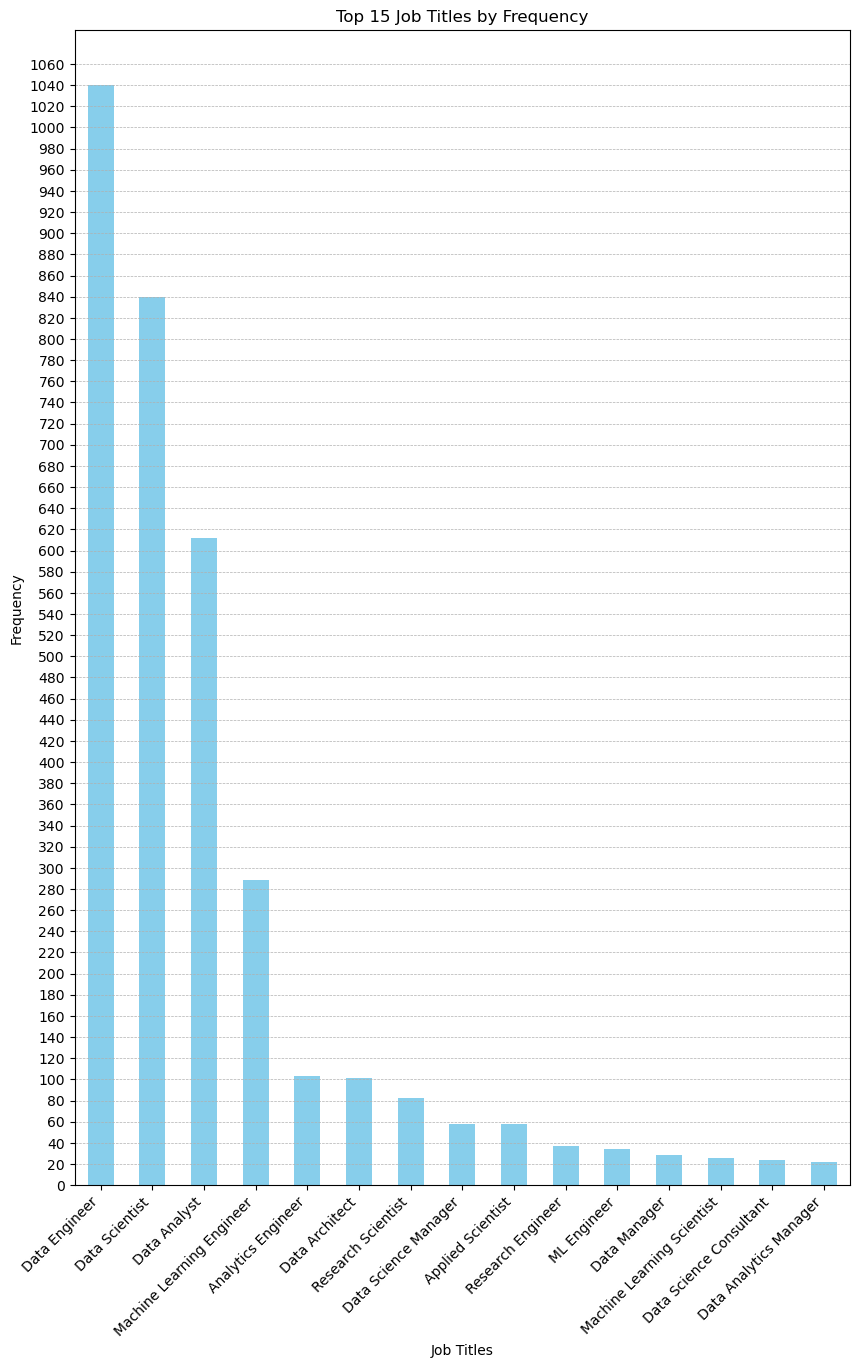

In [32]:
 # Set the size of the bar graph
plt.figure(figsize=(10, 15)) 

# Create a bar graph directly from the Series
top_jobs.plot(kind='bar', color='skyblue')  

# Title of the graph
plt.title('Top 15 Job Titles by Frequency')  

 # X-axis label
plt.xlabel('Job Titles') 

 # Y-axis label
plt.ylabel('Frequency') 

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  

#For better readability
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)  # Add a grid for the y-axis

# Setting y-axis ticks to increment by 50
# Adjust the max range appropriately by ensuring it covers the max frequency directly from top_jobs
plt.yticks(range(0, max(top_jobs) + 40, 20))

 # Saves the figure as a PNG file
plt.savefig('top_job_titles.png') 
plt.show()

### 4.2. Job that has the highest salaries illustrated with bar graph

In [34]:
# Group by 'job_title' and calculate the average salary for each job
job_salary = clean_data.groupby('job_title')['salary_in_usd'].max()

# Sort the resulting Series by salary in descending order to get the highest paying jobs at the top
job_salary = job_salary.sort_values(ascending=False)

# Select the top 15 highest paying job titles and round the mean salary values to two decimal places
top_salary = job_salary.head(10).round(2)


print("Top 15 Highest Paying Job Titles:")
print (top_salary)

Top 15 Highest Paying Job Titles:
job_title
Research Scientist                    450000
Data Analyst                          430967
AI Scientist                          423834
Applied Machine Learning Scientist    423000
Principal Data Scientist              416000
Data Scientist                        412000
Data Analytics Lead                   405000
Applied Data Scientist                380000
Data Architect                        376080
Data Science Tech Lead                375000
Name: salary_in_usd, dtype: int64


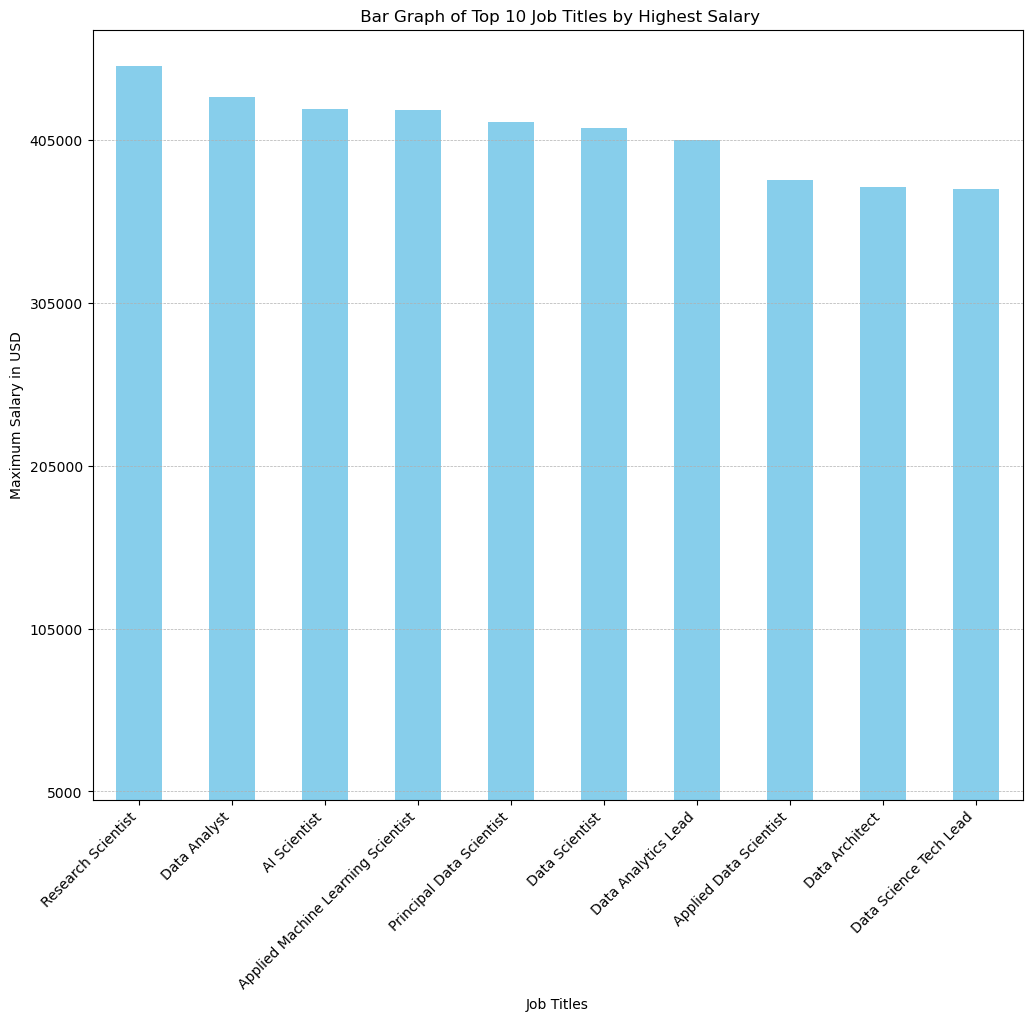

In [35]:
# Plotting the top 15 highest paying job titles

# Set the size of the plot
plt.figure(figsize=(12, 10))  

# Create a bar graph from the Series
top_salary.plot(kind='bar', color='skyblue')  

# Set the title of the plot
plt.title(' Bar Graph of Top 10 Job Titles by Highest Salary')  

# Set the label for the x-axis
plt.xlabel('Job Titles')  

# Set the label for the y-axis
plt.ylabel('Maximum Salary in USD')  

# Rotate the job titles on the x-axis for better readability
plt.xticks(rotation=45, ha='right')  


# Set y-ticks based on the computed min and max salary
plt.yticks(np.arange(5000, 450000 + 10000, 100000))

# Add a grid for the y-axis
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)  

# Save the plot as a PNG file
plt.savefig('top_salary.png')

# Display the plot
plt.show()

### 4.2. Salaries based on Experience Level illustrated with bar graph

In [37]:
# Group by 'experience_level' and calculate the mean salary
experience_salary = clean_data.groupby('experience_level')['salary_in_usd'].mean()

# Sort the resulting Series by salary in descending order to get the highest paying jobs at the top based on experience level
experience_salary = experience_salary.sort_values(ascending=False)

print ("Salaries based on Experience Level : ") 
experience_salary

Salaries based on Experience Level : 


experience_level
Executive Level              194930.929825
Senior Level/Expert          153051.071542
Medium Level/Intermediate    104525.939130
Entry-Level                   78546.284375
Name: salary_in_usd, dtype: float64

### Bar Graph of Experience Level By Average Salary

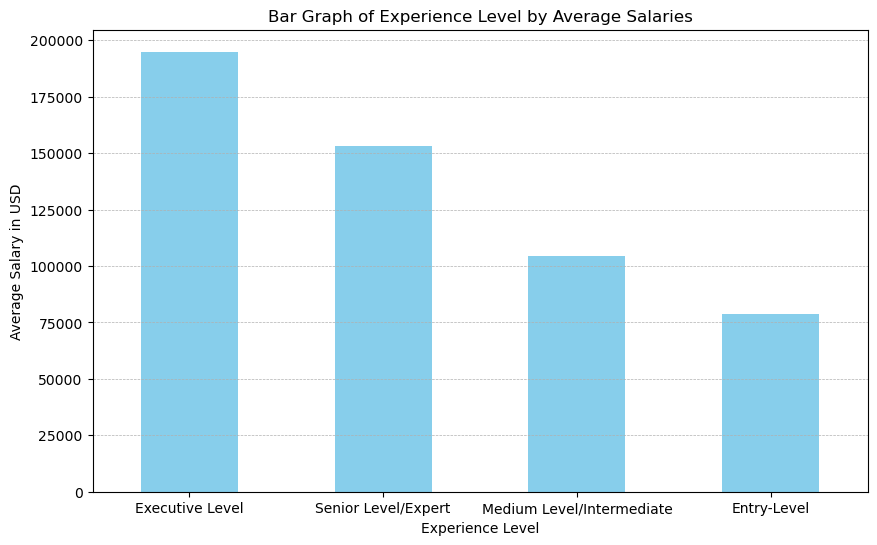

In [39]:
# Plotting the average salaries by experience level

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))  

# Create a bar graph
experience_salary.plot(kind='bar', color='skyblue')  

# Set the title of the plot
plt.title('Bar Graph of Experience Level by Average Salaries')  

# Set the label for the x-axis
plt.xlabel('Experience Level')  

# Set the label for the y-axis
plt.ylabel('Average Salary in USD')  

# Keep the labels on the x-axis horizontal 
plt.xticks(rotation=0)  

# Add a grid for the y-axis
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)  

plt.savefig('average_salary.png')

# Display the plot
plt.show()  

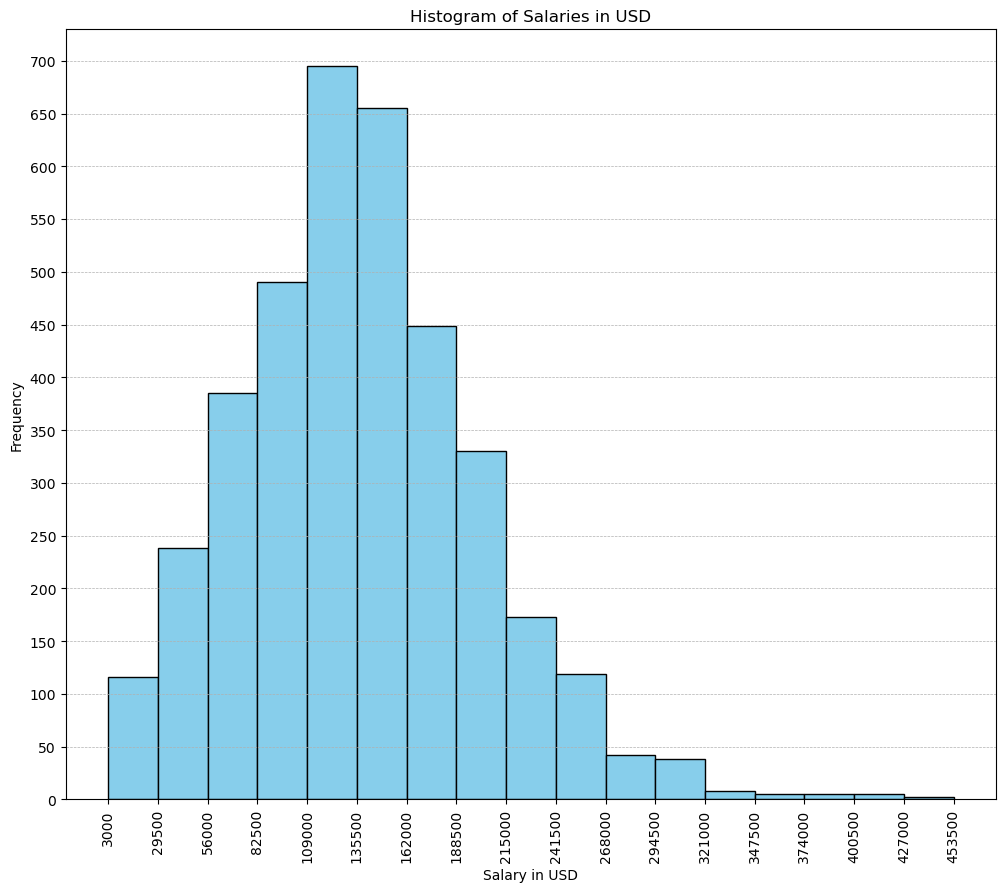

In [40]:
plt.figure(figsize=(12, 10))

x = clean_data['salary_in_usd']

# Calculate the minimum and maximum salary for dynamic bin range
max_salary = x.max()
min_salary = x.min()
xbins = np.arange(3000, max_salary + 10000, 26500)

# Create the histogram with specified bins and color
salary_histogram = plt.hist(x, bins=xbins, color='skyblue', edgecolor='black') 

plt.title('Histogram of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

# Improve tick marks on the x-axis
plt.xticks(xbins, rotation=90)

# Calculate the maximum frequency (number of entries in the most populated bin)
max_freq = salary_histogram[0].max()
interval = np.arange(0, max_freq + 50, 50)
plt.yticks(interval)

plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.savefig('histogram_of_salaries,png')

plt.show()

### Box Plot of Salary In USD column

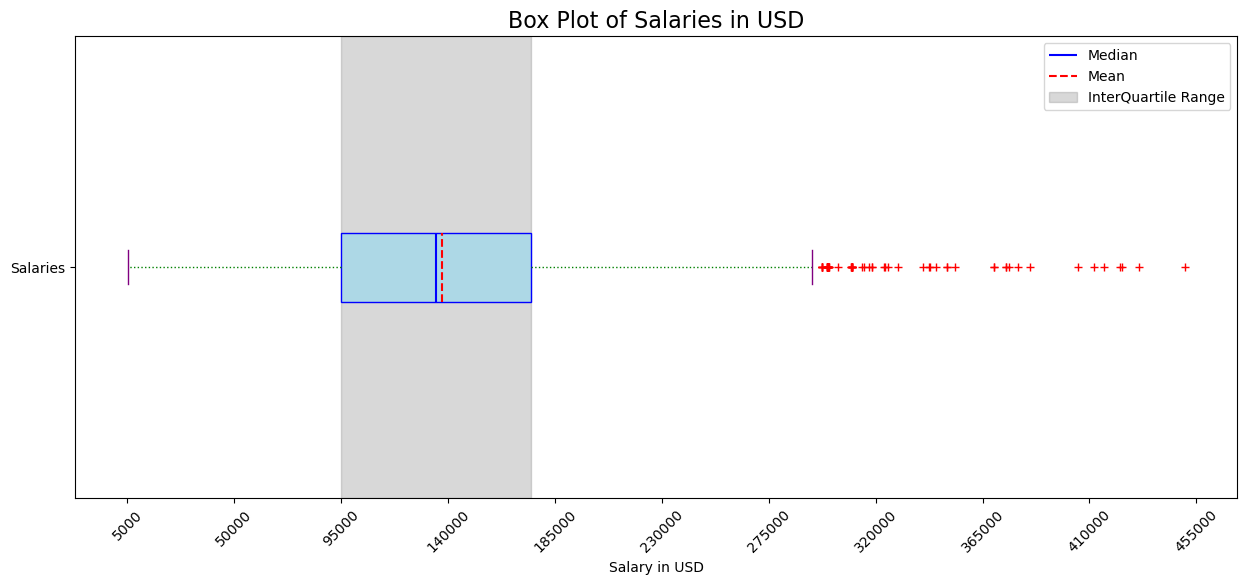

In [42]:
x = clean_data['salary_in_usd']

# Create the box plot with horizontal orientation
plt.figure(figsize=(15, 6))
box = plt.boxplot(x, patch_artist=True, vert=False, sym='r+', showmeans=True,
                  meanline=True, meanprops=dict(color='red', linestyle='--', linewidth=1.5, label='Mean'),
                  medianprops=dict(color='blue', linewidth=1.5, label='Median'),
                  whiskerprops=dict(color='green', linestyle=':'),
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  capprops=dict(color='purple'))

# Calculate relevant statistics for better annotation
median = np.median(x)
mean = np.mean(x)
min_val = np.min(x)
max_val = np.max(x)
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3 - q1

# Adding title and labels
plt.title('Box Plot of Salaries in USD', fontsize=16)
plt.xlabel('Salary in USD')  # Since it's a horizontal plot

# Customize x-axis to show a single tick label
plt.yticks([1], ['Salaries'])

# Generate ticks from minimum to maximum with a specific step, and enhance readability
step = 45000  # Adjust step size based on your data range
ticks = np.arange(5000, max_val + step, step)
plt.xticks(ticks, rotation=45)


# Highlight the IQR range
plt.axvspan(q1, q3, color='grey', alpha=0.3, label='InterQuartile Range')

# Add a legend to the plot to make it more informative
plt.legend(loc='upper right')

# Display the plot
plt.show()